# Sampling
The data that you use to train your model is a subset of real-world data, created by one sampling method or another. There are two families of sampling: **nonprobability sampling** and **random sampling**.

### Nonprobability Sampling
Nonprobability sampling is when the selection of data isn’t based on any probability criteria. Here are some of the criteria for nonprobability sampling:
- **Convenience sampling**: Samples of data are selected based on their availability.
- **Snowball sampling**: Samples are selected based on referrals from other samples.
- **Judgment sampling**: Samples are selected based on the judgment of the researcher.
- **Quota sampling**: Samples are selected based on a pre-defined quota.

### Simple Random Sampling
In the simplest form of random sampling, you give all samples in the population equal probabilities of being selected.
The advantage of this method is that it’s easy to implement. The drawback is that rare categories of data might not appear in your selection.

### Stratified Sampling
To avoid the drawback of simple random sampling, you can first divide your population into the groups that you care about and sample from each group separately.

### Weighted Sampling
In weighted sampling, each sample is given a weight, which determines the probability of it being selected.


In [1]:
import random
random.choices(population=[1, 2, 3, 4, 100, 1000], weights=[0.2, 0.2, 0.2, 0.2, 0.1, 0.1], k=2)
random.choices(population=[1, 1, 2, 2, 3, 3, 4, 4, 100, 1000], k=2) # equivalent to weighted sampling above

[3, 3]

### Reservoir Sampling
Reservoir sampling is a fascinating algorithm that is especially useful when you have to deal with streaming data, which is usually what you have in production.

Imagine you have an incoming stream of tweets and you want to sample a certain number, k, of tweets to do analysis or train a model on. You don’t know how many tweets there are, but you know you can’t fit them all in memory, which means you don’t know in advance the probability at which a tweet should be selected.

1. Put the first k elements into the reservoir (array).
2. For each incoming nth element, generate a random number i such that 1 ≤ i ≤ n.
3. If 1 ≤ i ≤ k: replace the ith element in the reservoir with the nth element. Else, do nothing.


### Importance Sampling
Imagine you have to sample x from a distribution P(x), but P(x) is really expensive, slow, or infeasible to sample from. However, you have a distribution Q(x) that is a lot easier to sample from. So you sample x from Q(x) instead and weigh this sample by
$Q(x)(P(x) / Q(x))$ is called the ***proposal distribution*** or the ***importance distribution***. Q(x) can be any distribution as long as Q(x) > 0 whenever P(x) ≠ 0.

One example where importance sampling is used in ML is policy-based reinforcement learning. Consider the case when you want to update your policy. It might be very expensive, but since it is very similar to the old one, you can use importance sampling to reuse the old policy to update the new one.

# Labeling
Despite the promise of unsupervised ML, most ML models in production today are supervised, which means that they need labeled data to learn from. The performance of an ML model still depends heavily on the quality and quantity of the labeled data it’s trained on.

### Manual Labeling (Hand Labeling)
- Expensive: Classifying spams is easy, labeling chest X-rays - extremely hard, need to find board-certified radiologists.
- Threat to a data privacy: someone has to look at your data, which isn’t always possible if your data has strict privacy requirements.
- Slow

### Label ambiguity or label multiplicity
To obtain enough labeled data, companies have to use data from multiple sources and rely on multiple annotators who have different levels of expertise. These different data sources and annotators also have different levels of accuracy.

### Natural Labels
Tasks with natural labels are tasks where the model’s predictions can be automatically evaluated or partially evaluated by the system. An example is the model that estimates time of arrival for a certain route on Google Maps. If you take that route, by the end of your trip, Google Maps knows how long the trip actually took, and thus can evaluate the accuracy of the predicted time of arrival. Another example is stock price prediction. If your model predicts a stock’s price in the next two minutes, then after two minutes, you can compare the predicted price with the actual price.

# Handling the Lack of Labels

### Weak supervision
The insight behind weak supervision is that people rely on heuristics, which can be developed with subject matter expertise, to label data. For example, If the nurse’s note mentions a serious condition like pneumonia, the patient’s case should be given priority consideration.

LF(labeling function)s can encode many different types of heuristics
- **Keyword-based LFs**: If the word “urgent” appears in the text, then the patient’s case should be given priority consideration.
- **Regular expressions**: If the text contains a date, then the patient’s case should be given priority consideration.
- **Database lookup**: Such as if the note contains the disease listed in the dangerous disease list
- **The outputs of other models**: Such as if an existing system classifies this as EMERGENT

![labeling functions](./screenshots/labeling-functions.png)

### Semi-supervised labeling
If weak supervision leverages heuristics to obtain noisy labels, semi-supervision leverages structural assumptions to generate new labels based on a small set of initial labels. Unlike weak supervision, semi-supervision requires an initial set of labels.

A classic semi-supervision method is **self-training**. You start by training a model onyour existing set of labeled data and use this model to make predictions for unlabeled samples. Another semi-supervision method assumes that data samples that share similar characteristics share the same labels.

- You can use ***K nearest neighbors*** to propagate labels from labeled samples to unlabeled samples.

A semi-supervision method that has gained popularity in recent years is the perturbation-based method. ***It’s based on the assumption that small perturbations to a sample shouldn’t change its label.***

### Transfer learning
Transfer learning refers to the family of methods where a model developed for a task is reused as the starting point for a model on a second task.

### Active learning
Instead of randomly labeling data samples, you label the samples that are most helpful to your models according to some metrics or heuristics. The most straightforward metric is uncertainty measurement—label the examples that your model is the least certain about, hoping that they
will help your model learn the decision boundary better.

For example, in the case of classification problems where your model outputs raw probabilities for different classes, it might choose the data samples with the lowest probabilities for the predicted class.

# Class Imbalance
Class imbalance typically refers to a problem in classification tasks where there is a substantial difference in the number of samples in each class of the training data. For example, in a training dataset for the task of detecting lung cancer from X-ray images, 99.99% of the X-rays might be of normal lungs, and only 0.01% might contain cancerous cells.

![imbalanced data](./screenshots/imbalanced-data.png)

### Handling Class Imbalance

- Right metric: Use metrics that are robust to class imbalance, such as precision, recall, F1 score, ROC-AUC, and PR-AUC.

$$
Precision = \frac{TP}{TP + FP};
Recall = \frac{TP}{TP + FN};
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$

We can plot the **true positive rate** against the **false positive rate** for different thresholds. This plot is known as the **ROC** curve (receiver operating characteristics). The area under the ROC curve is called **ROC-AUC**. The ROC curve is a good way to visualize the trade-off between true positive rate and false positive rate.


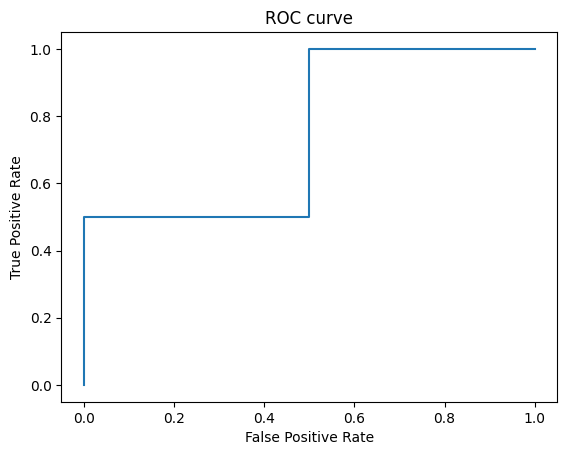

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_true = [0, 0, 1, 1]
y_scores = [0.1, 0.4, 0.35, 0.8]
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [3]:
# calculate AUC
roc_auc_score(y_true, y_scores)

np.float64(0.75)

![roc](./screenshots/roc.png)


# Data-level methods: Resampling

Data-level methods modify the distribution of the training data to reduce the level of imbalance to make it easier for the model to learn. A common family of techniques is resampling
- **Oversampling**: Increase the number of samples in the minority class.
- **Undersampling**: Decrease the number of samples in the majority class.

Undersampling runs the risk of losing important data from removing data. Oversampling runs the risk of overfitting on training data, especially if the added copies of the minority class are replicas of existing data. Many sophisticated sampling techniques have been developed to mitigate these risks.

One such technique is **two-phase learning**. You first train your model on the resampled data. This resampled data can be achieved by randomly undersampling large classes until each class has only N instances. You then fine-tune your model on the original data.

### Algorithm level methods
Keeps the distribution of the data intact but modifies the algorithm to handle class imbalance better. Because the loss function (or the cost function) guides the learning process, many algorithm-level methods involve adjustment to the **loss function**.

### Cost-sensitive learning
Use cost matrix $C_{ij}$, the cost if class i is classified as class j.

### Class-balanced loss.
Make weights inversely proportional to the class frequencies.

### Focal loss
In our data, some examples are easier to classify than others, and our model might learn to classify them quickly. We want the model to focus on the hard examples. The focal loss does this by down-weighting the easy examples.

# Data Augmentation
Data augmentation is a family of techniques that are used to increase the amount of training data. The idea is to create new training samples by transforming the existing samples in the training data.

### Simple label preserving transformations
For example, in the case of image data, you can flip the image horizontally or vertically, rotate the image, zoom in or out, or change the brightness of the image.

In NLP, you can randomly replace a word with a similar word, assuming that this replacement wouldn’t change the meaning or the sentiment of the sentence.

### Perturbation
Perturbation is also a label-preserving operation, but because sometimes it’s used to trick models into making wrong predictions.

Neural networks, in general, are sensitive to noise. In the case of computer vision, this means that adding a small amount of noise to an image can cause a neural network to misclassify it.


# Data synthesis
Synthetic data is artificially generated data that is designed to mimic real-world data. It is created using algorithms and statistical models that replicate the patterns, characteristics, and relationships found in real-world data. Synthetic data can be used to train and test machine learning models, improve privacy and security, and reduce bias in data sets, among other things.

One of the main advantages of synthetic data is that it can be generated in large quantities and with different characteristics, making it possible to create diverse data sets that can be used to train machine learning models. This is particularly useful when real-world data is scarce or hard to obtain.

https://moez-62905.medium.com/synthetic-data-is-the-future-of-artificial-intelligence-6fcfd2ce1a14